In [74]:
import sys
import logging
import matplotlib.pyplot as plt
import cstrees.cstree as ct
import cstrees.scoring as sc
import cstrees.stage as st
import cstrees.learning as ctl
import networkx as nx
import numpy as np
%load_ext autoreload
%autoreload 2
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from cstrees import csi_relation

ci = csi_relation.CI({1,2}, {3,4},{5})
print(ci)
dec = csi_relation.decomposition(ci)
for d in dec:
    print(d)

X1, X2 ⊥ X3, X4 | X5
X1 ⊥ X3 | X5
X1 ⊥ X4 | X5
X2 ⊥ X3 | X5
X2 ⊥ X4 | X5


In [76]:
wk = csi_relation.weak_union(ci)
for w in wk:
    print(w)

X1, X2 ⊥ X4 | X3, X5
X1, X2 ⊥ X3 | X4, X5
X2 ⊥ X3, X4 | X1, X5
X1 ⊥ X3, X4 | X2, X5


In [77]:
print("Original CI: ", ci)
pw = csi_relation.pairwise_cis(ci)
print("Pairwise CIs:")
for x in pw:
    print(x)

Original CI:  X1, X2 ⊥ X3, X4 | X5
Pairwise CIs:
X1 ⊥ X3 | X2, X4, X5
X1 ⊥ X4 | X2, X3, X5
X2 ⊥ X3 | X1, X4, X5
X2 ⊥ X4 | X1, X3, X5


In [78]:
c = csi_relation.Context({6:0})
csi = csi_relation.CSI(ci, c)

print("Original CSI: ", csi)
pw = csi_relation.pairwise_csis(csi)
print("Pairwise CSIs:")
for x in pw:
    print(x)

Original CSI:  X1, X2 ⊥ X3, X4 | X5, X6=0
Pairwise CSIs:
X1 ⊥ X3 | X2, X4, X5, X6=0
X1 ⊥ X4 | X2, X3, X5, X6=0
X2 ⊥ X3 | X1, X4, X5, X6=0
X2 ⊥ X4 | X1, X3, X5, X6=0


     a  b  c
0    2  2  2
1    1  0  1
2    1  0  0
3    1  0  0
4    0  0  0
..  .. .. ..
496  1  1  1
497  0  0  0
498  1  0  0
499  0  0  0
500  1  0  1

[501 rows x 3 columns]


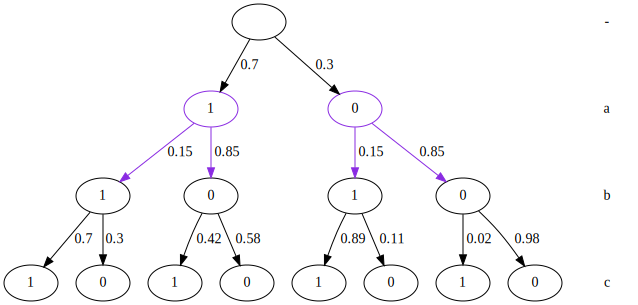

In [79]:
np.random.seed(6)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

# V-structure
tree.update_stages({
    0: [st.Stage([{0, 1}])],
    1: [st.Stage([0, 0]), st.Stage([0, 1]), st.Stage([1, 0]), st.Stage([1, 1])]})

tree.sample_stage_parameters(alpha=1.0)

a = tree.plot()

# a.draw("testplot.png")
x = tree.sample(500)
print(x)

true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
a


In [80]:

order = ["a", "b", "c"]
# Should order be expressed as the labels or as the levels?
# labels seems more natural but may include strings then which is a bit ugly.

# This is the order of the data columns.
s1 = sc.score_order(order, x, max_cvars=2, alpha_tot=1.0, method="BDeu")
print(s1)


-800.2923697467342
-800.2923697467342


In [81]:
#order = [0, 2, 1]
order = ["a", "c", "b"]  # We know that b should not be to the very right.
s2 = sc.score_order(order, x, max_cvars=2, alpha_tot=1.0, method="BDeu")
print(s2)


-803.505552644574
-803.505552644574


In [82]:
#order = [0, 2, 1]
import random
np.random.seed(1)
random.seed(1)
tree = ct.sample_cstree([2,2,2,2], max_cvars=1, prob_cvar=0.5, prop_nonsingleton=1)
tree.to_df()

,0,1,2,3
0,2,2,2,2
1,*,-,-,-
2,*,1,-,-
3,*,0,-,-
4,0,*,*,-
5,1,*,*,-


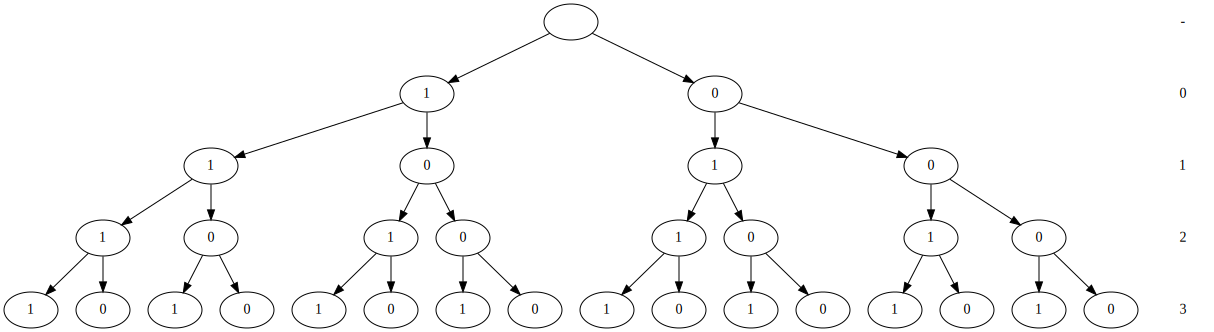

In [83]:
tree.plot()

In [84]:
tree.sample_stage_parameters(alpha=1.0)
df = tree.sample(1000)

counts = sc.counts_at_level(tree, 2, df)

for key, val in counts.items():
    print("Stage: {}".format(key))
    print("Counts: {}".format(val))

Stage: [{0, 1}, 1]; probs: [0.45616876 0.54383124]; color: blueviolet
Counts: {1: 397, 0: 307}
Stage: [{0, 1}, 0]; probs: [0.58753532 0.41246468]; color: orange
Counts: {0: 188, 1: 108}


In [85]:
sc.score_level(tree, 2, counts, alpha_tot=1.0, method="BDeu")

-684.0089732819953

In [86]:
stage = tree.stages[1][0]
print(stage)
param_est = sc.estimate_parameters(tree, stage, counts, alpha_tot=1.0, method="BDeu")
print(param_est)

[{0, 1}, 1]; probs: [0.45616876 0.54383124]; color: blueviolet
[0.436124911284599, 0.563875088715401]


In [87]:
sc.score(tree, df, alpha_tot=1.0, method="BDeu")

-2243.125809060672

In [88]:
sc.score_order([0, 1, 2, 3], df, max_cvars=1, alpha_tot=1.0, method="BDeu")

-2243.125809060672


-2243.125809060672

-800.2923697467342
-803.505552644574
-800.2923697467342
-803.5611173556063
-803.5055526445738
-803.5611173556063
optimal order: ['a', 'b', 'c'], score -800.2923697467342
stages :{0: [<cstrees.stage.Stage object at 0x7feee3a5abf0>], 1: [<cstrees.stage.Stage object at 0x7feee3959600>, <cstrees.stage.Stage object at 0x7feee395b490>, <cstrees.stage.Stage object at 0x7feee395a440>], 2: [], -1: [<cstrees.stage.Stage object at 0x7feeea7bdc00>]}

Optimal CStree stagings per level:
level 0:
[{0, 1}]
level 1:
[{0, 1}, 1]
[0, 0]
[1, 0]
level 2:


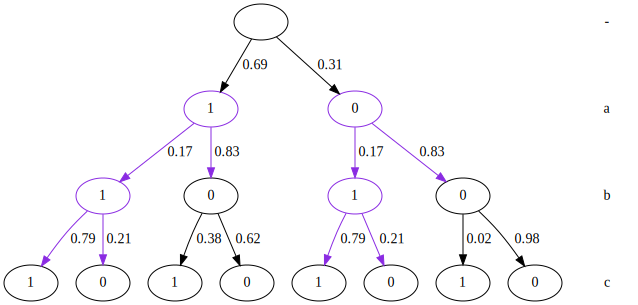

In [89]:
optord, score = ctl._find_optimal_order(
    x, strategy="max", max_cvars=2, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ctl._optimal_cstree_given_order(optord, x, max_cvars=2,
                             alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))

print("\nOptimal CStree stagings per level:")
for key, val in opttree.stages.items():
    if key == -1:
        continue
    print("level {}:".format(key))
    for val2 in val:
        print(val2)
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.plot()


In [90]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_opt.png",
                args='-Glabel="'+str(key)+'"   ')


In [91]:
tree = ctl.find_optimal_cstree(x, max_cvars=2, alpha_tot=1.0, method="BDeu")

tree.to_df()


-800.2923697467342
-803.505552644574
-800.2923697467342
-803.5611173556063
-803.5055526445738
-803.5611173556063


,a,b,c
0,2,2,2
1,*,-,-
2,*,1,-
3,0,0,-
4,1,0,-


In [92]:
list(range(10,1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]

In [104]:
order = ["a", "b", "c"]
orderscore = sc.score_order(order, x, strategy="posterior", max_cvars=2, alpha_tot=1.0, method="BDeu")
nodescores = [sc._score_order_at_level(order, level, x, strategy="posterior", max_cvars=2, alpha_tot=1.0, method="BDeu") for level in range(len(order))]
print(orderscore)
print(nodescores)
print(np.sum(nodescores))
neig = ctl.get_relocation_neighborhood(order, 1, orderscore, nodescores, x, max_cvars=2, alpha_tot=1.0, method="BDeu")
print(order)
print("nodescores: ", nodescores)

print("neig: ", list(neig))


<class 'list'>
<class 'list'>
score at level 0 : -311.7853715820648
<class 'list'>
<class 'list'>
score at level 1 : -233.10521167901575
<class 'list'>
<class 'list'>
score at level 2 : -256.59276128663123
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
-801.4833445477118
[-311.7853715820648, -233.10521167901575, -256.59276128663123]
-801.4833445477118
['a', 'b', 'c']
moving b to the right
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
['a', 'c', 'b']
moving b to the left
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
['a', 'b', 'c']
moving b to the left
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
['b', 'a', 'c']
moving b to the right
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
['a', 'b', 'c']
['a', 'b', 'c']
nodescores:  [-311.7853715820648, -233.10521167901575, -256.59276128663123]
neig:  [-801.4833445477118, -801.4833445477118, -804.7359713948955]


In [147]:
ctl.gibbs_order_sampler(10, x, max_cvars=2, alpha_tot=1.0, method="BDeu")

initial order: ['a', 'b', 'c']
initial score: -801.4833445477118
iteration: 1
['a', 'b', 'c']
moving b to the right
['a', 'c', 'b']
moving b to the left
['a', 'b', 'c']
moving b to the left
['b', 'a', 'c']
moving b to the right
['a', 'b', 'c']
proposal probs: [0.49051528 0.49051528 0.01896945]
new pos: 0
iteration: 2


IndexError: list index out of range